In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [3]:
df = pd.read_csv('GOOG.csv')

In [4]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [6]:
google_data = df[['date','open','close']]
google_data['date'] = pd.to_datetime(google_data['date'].apply(lambda x : x.split()[0]))
google_data.set_index('date', drop = True, inplace = True)
google_data.head()

<ipython-input-6-15bfb66c6a02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_data['date'] = pd.to_datetime(google_data['date'].apply(lambda x : x.split()[0]))


,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71


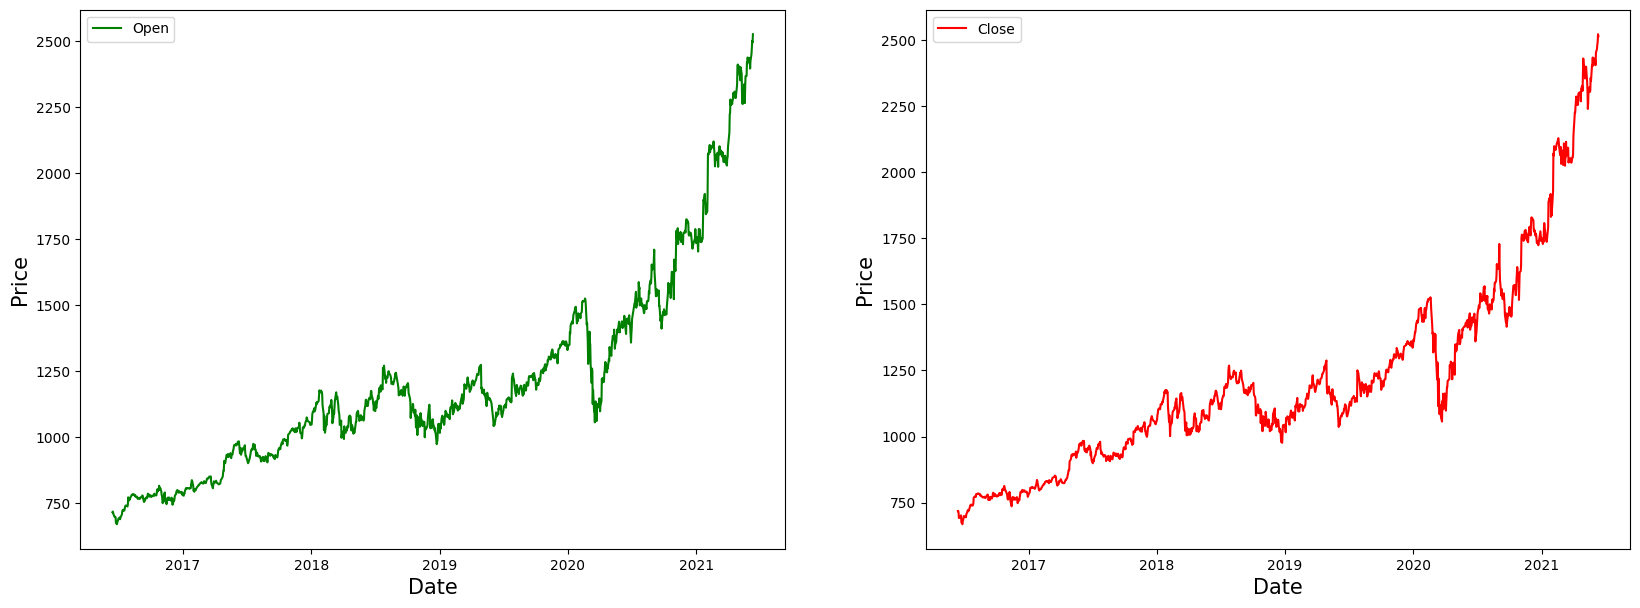

In [7]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(google_data['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(google_data['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

In [8]:
google_data.shape

(1258, 2)

In [9]:
mms = MinMaxScaler()
google_data[google_data.columns] = mms.fit_transform(google_data)

<ipython-input-9-7a43e9cd329b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_data[google_data.columns] = mms.fit_transform(google_data)


In [10]:
google_data.shape

(1258, 2)

In [11]:
training_size = round(google_data.shape[0]*0.8)
print(training_size)

1006


In [12]:
train_data = google_data[:training_size]
test_data = google_data[training_size:]

In [13]:
print(train_data.shape)
print(test_data.shape)

(1006, 2)
(252, 2)


In [14]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start = 0

  for stop in range(50,len(dataset)):
    sequences.append(dataset.iloc[start:stop])
    labels.append(dataset.iloc[stop])
    start += 1
  return (np.array(sequences),np.array(labels))

In [15]:
# len(train_seq[0])

In [16]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [17]:
print(train_seq.shape)
print(train_label.shape)
print(test_seq.shape)
print(test_label.shape)

(956, 50, 2)
(956, 2)
(202, 50, 2)
(202, 2)


In [33]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units = 50))

model.add(Dense(2))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(train_seq,train_label,epochs = 150, validation_data = (test_seq,test_label), verbose = 2)

Epoch 1/150
30/30 - 8s - loss: 0.0091 - accuracy: 0.5429 - val_loss: 0.0177 - val_accuracy: 0.4010 - 8s/epoch - 264ms/step
Epoch 2/150
30/30 - 2s - loss: 8.6351e-04 - accuracy: 0.5805 - val_loss: 0.0072 - val_accuracy: 0.4010 - 2s/epoch - 57ms/step
Epoch 3/150
30/30 - 2s - loss: 5.4697e-04 - accuracy: 0.5554 - val_loss: 0.0038 - val_accuracy: 0.5990 - 2s/epoch - 55ms/step
Epoch 4/150
30/30 - 2s - loss: 5.2168e-04 - accuracy: 0.5690 - val_loss: 0.0041 - val_accuracy: 0.5990 - 2s/epoch - 56ms/step
Epoch 5/150
30/30 - 2s - loss: 5.0025e-04 - accuracy: 0.5575 - val_loss: 0.0017 - val_accuracy: 0.5990 - 2s/epoch - 73ms/step
Epoch 6/150
30/30 - 3s - loss: 4.8182e-04 - accuracy: 0.5544 - val_loss: 0.0024 - val_accuracy: 0.5990 - 3s/epoch - 91ms/step
Epoch 7/150
30/30 - 2s - loss: 4.6785e-04 - accuracy: 0.5753 - val_loss: 0.0029 - val_accuracy: 0.5990 - 2s/epoch - 57ms/step
Epoch 8/150
30/30 - 2s - loss: 4.2185e-04 - accuracy: 0.5941 - val_loss: 0.0025 - val_accuracy: 0.5990 - 2s/epoch - 56ms/

In [35]:
pred = model.predict(test_seq)

7/7 [==============================] - 1s 19ms/step


In [24]:
test_inverse_predicted = mms.inverse_transform(pred)

In [25]:
test_inverse_predicted

array([[1553.6685, 1551.5344],
       [1566.5079, 1563.6575],
       [1575.8142, 1572.1794],
       [1599.3484, 1594.6252],
       [1618.342 , 1613.1868],
       [1624.7427, 1619.1919],
       [1623.472 , 1617.2494],
       [1626.0933, 1619.0392],
       [1659.3931, 1651.4121],
       [1661.4634, 1654.454 ],
       [1616.8977, 1610.6736],
       [1543.2953, 1537.0846],
       [1512.7959, 1505.9911],
       [1500.8347, 1495.8715],
       [1492.8748, 1491.0865],
       [1492.2051, 1493.4629],
       [1501.3475, 1504.9388],
       [1506.8203, 1512.1028],
       [1488.187 , 1494.339 ],
       [1461.46  , 1467.1367],
       [1424.1729, 1429.0435],
       [1414.3495, 1418.0764],
       [1403.3217, 1407.3186],
       [1393.0852, 1397.5468],
       [1398.2495, 1403.0035],
       [1419.8717, 1424.9934],
       [1437.4829, 1443.0453],
       [1445.9183, 1451.2288],
       [1457.489 , 1461.5865],
       [1449.9318, 1452.8419],
       [1449.8146, 1450.847 ],
       [1443.3837, 1443.2079],
       [

In [26]:
data = pd.concat([google_data.iloc[-202:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=google_data.iloc[-202:].index)], axis=1)

In [28]:
data.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-08-24,0.497853,0.496369,1553.668457,1551.534424
2020-08-25,0.491429,0.507171,1566.507935,1563.657471
2020-08-26,0.505416,0.530998,1575.814209,1572.179443
2020-08-27,0.530055,0.521259,1599.348389,1594.625244
2020-08-28,0.519165,0.526698,1618.342041,1613.186768


In [29]:
data[['open','close']] = mms.inverse_transform(data[['open','close']])

In [30]:
data.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-08-24,1593.98,1588.20,1553.668457,1551.534424
2020-08-25,1582.07,1608.22,1566.507935,1563.657471
2020-08-26,1608.00,1652.38,1575.814209,1572.179443
2020-08-27,1653.68,1634.33,1599.348389,1594.625244
2020-08-28,1633.49,1644.41,1618.342041,1613.186768


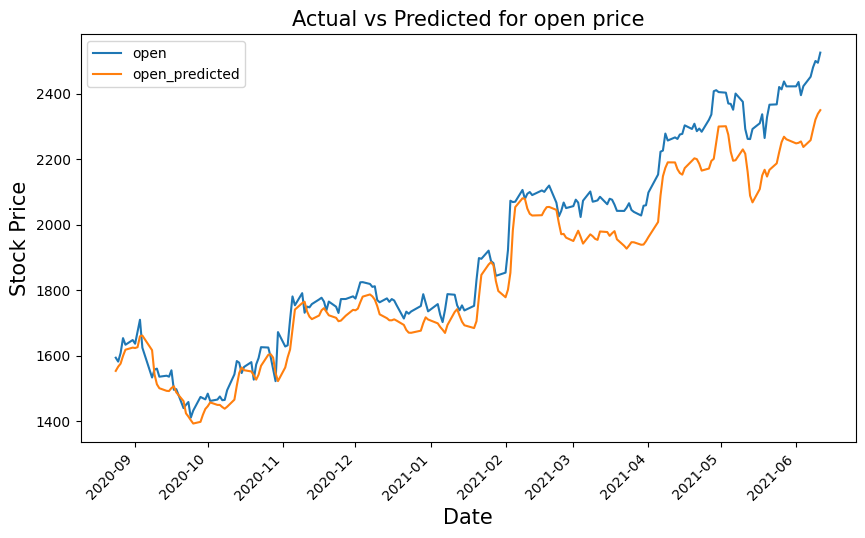

In [31]:
data[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

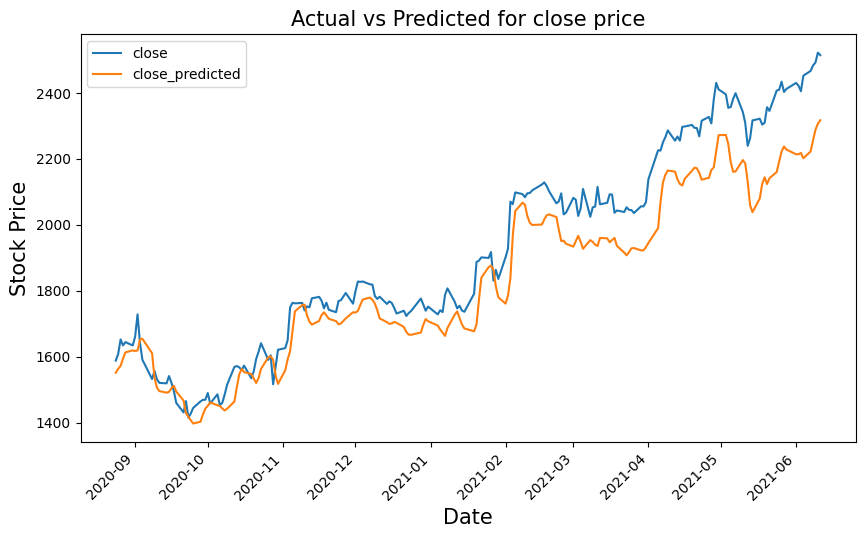

In [32]:
data[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()